Given a n * n matrix grid of 0's and 1's only. We want to represent the grid with a Quad-Tree.

Return the root of the Quad-Tree representing the grid.

Notice that you can assign the value of a node to True or False when isLeaf is False, and both are accepted in the answer.

A Quad-Tree is a tree data structure in which each internal node has exactly four children. Besides, each node has two attributes:

    val: True if the node represents a grid of 1's or False if the node represents a grid of 0's.
    isLeaf: True if the node is leaf node on the tree or False if the node has the four children.

class Node {
    public boolean val;
    public boolean isLeaf;
    public Node topLeft;
    public Node topRight;
    public Node bottomLeft;
    public Node bottomRight;
}

We can construct a Quad-Tree from a two-dimensional area using the following steps:

    If the current grid has the same value (i.e all 1's or all 0's) set isLeaf True and set val to the value of the grid and set the four children to Null and stop.
    If the current grid has different values, set isLeaf to False and set val to any value and divide the current grid into four sub-grids as shown in the photo.
    Recurse for each of the children with the proper sub-grid.

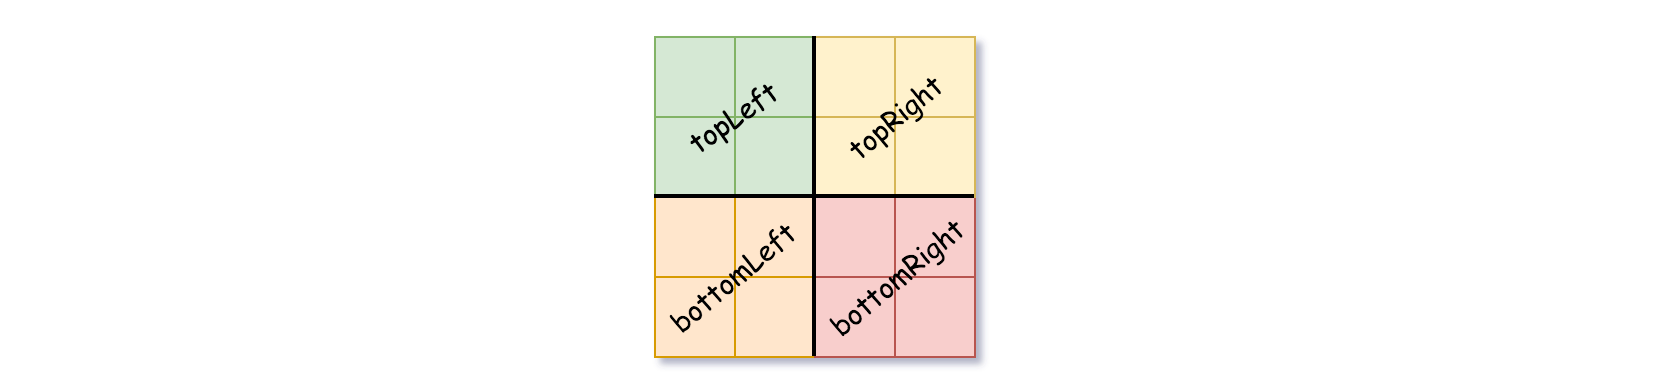

If you want to know more about the Quad-Tree, you can refer to the wiki.

Quad-Tree format:

The output represents the serialized format of a Quad-Tree using level order traversal, where null signifies a path terminator where no node exists below.

It is very similar to the serialization of the binary tree. The only difference is that the node is represented as a list [isLeaf, val].

If the value of isLeaf or val is True we represent it as 1 in the list [isLeaf, val] and if the value of isLeaf or val is False we represent it as 0.

Example 1:

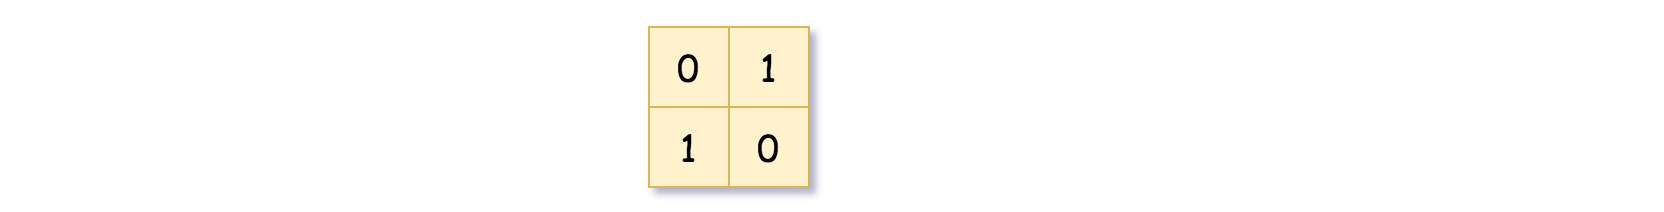

Input: grid = [[0,1],[1,0]]
Output: [[0,1],[1,0],[1,1],[1,1],[1,0]]
Explanation: The explanation of this example is shown below:
Notice that 0 represnts False and 1 represents True in the photo representing the Quad-Tree.

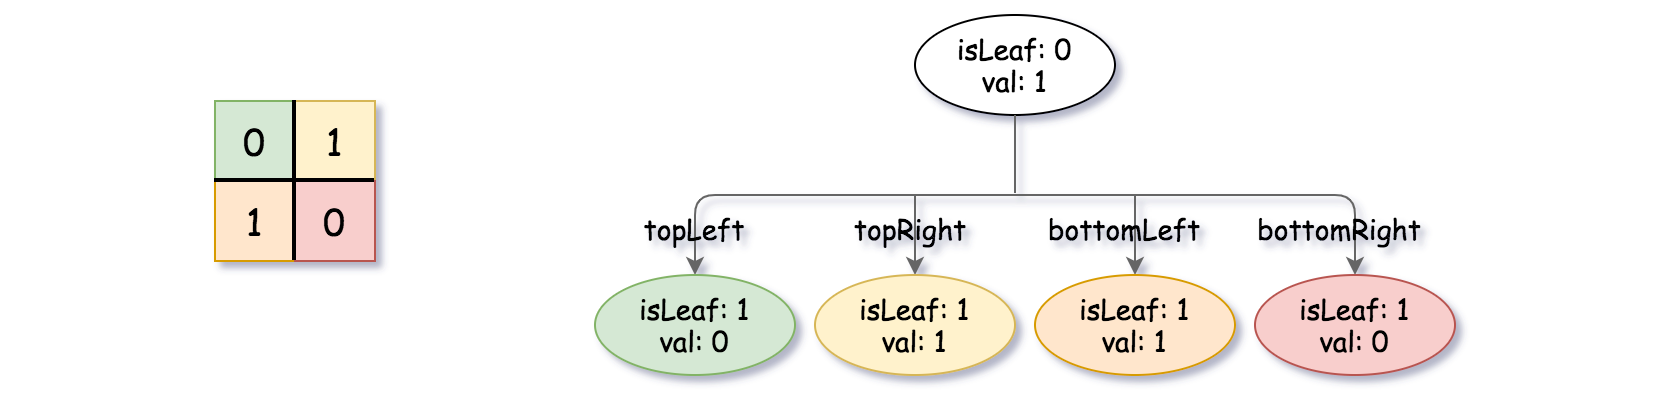

Example 2:

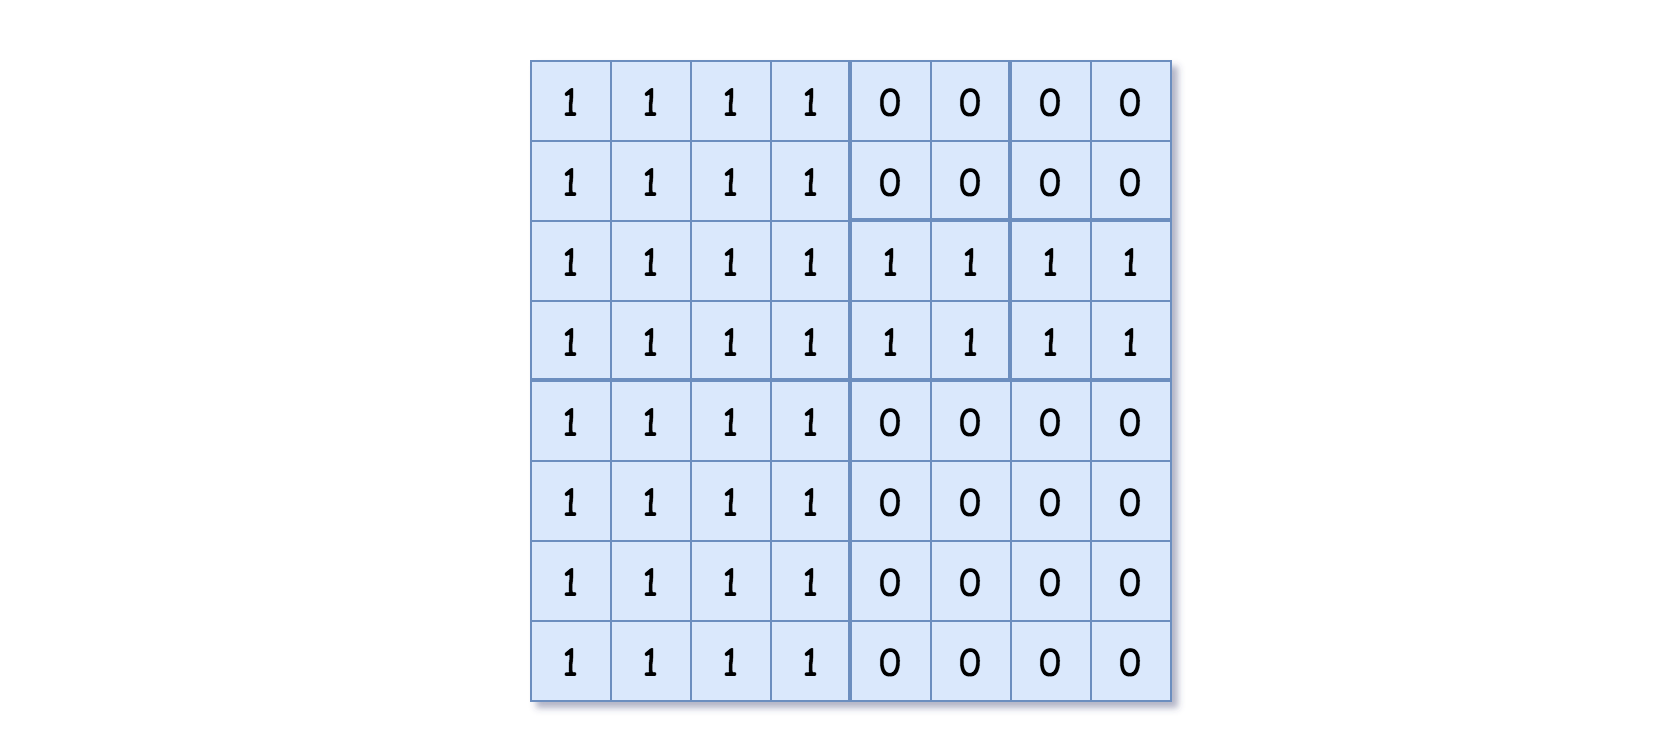

Input: grid = [[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0]]
Output: [[0,1],[1,1],[0,1],[1,1],[1,0],null,null,null,null,[1,0],[1,0],[1,1],[1,1]]
Explanation: All values in the grid are not the same. We divide the grid into four sub-grids.
The topLeft, bottomLeft and bottomRight each has the same value.
The topRight have different values so we divide it into 4 sub-grids where each has the same value.
Explanation is shown in the photo below:

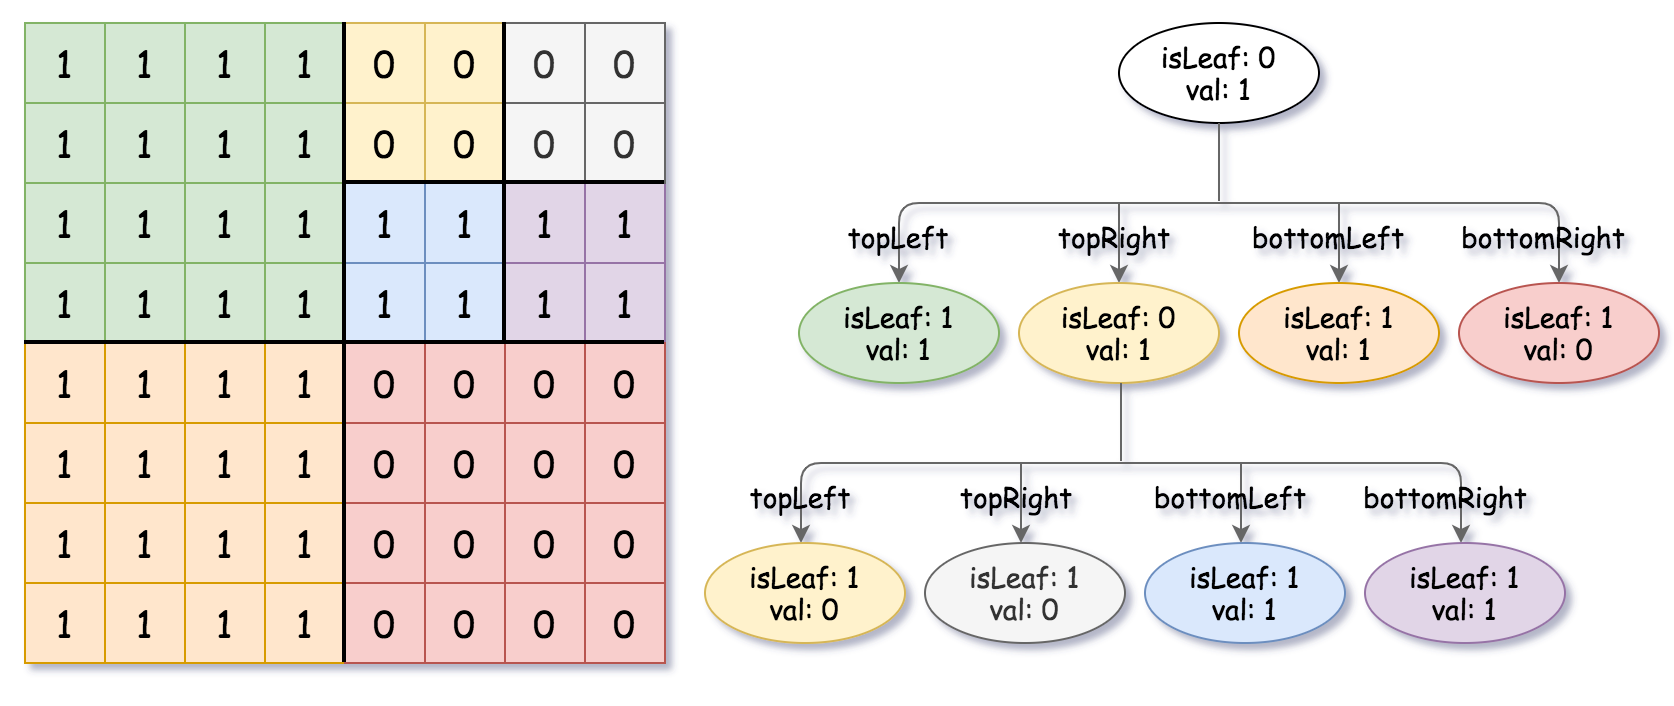

Constraints:

    n == grid.length == grid[i].length
    n == 2x where 0 <= x <= 6



In [35]:
from typing import List

# """
# # Definition for a QuadTree node.
class Node:
    def __init__(self, val, isLeaf, topLeft, topRight, bottomLeft, bottomRight):
        self.val = val
        self.isLeaf = isLeaf
        self.topLeft = topLeft
        self.topRight = topRight
        self.bottomLeft = bottomLeft
        self.bottomRight = bottomRight
# """

class Solution:
    def construct(self, grid: List[List[int]]) -> 'Node':
        def check_unique(x, y, s):
            # check if all values are equal
            if s == 1:
                return True
            else:
                unique_vals = set()
                for i in range(x, x + s):
                    unique_vals = unique_vals.union(set(grid[i][y:y + s]))

                if len(unique_vals) == 1:
                    return True
                else:
                    return False
        
        def construct_quadtree(x, y, s):
            if check_unique(x, y, s):
                return Node(
                    val=grid[x][y], 
                    isLeaf=True, 
                    topLeft=None, 
                    topRight=None, 
                    bottomLeft=None, 
                    bottomRight=None,
                )
            else:
                return Node(
                    val=grid[x][y], 
                    isLeaf=False, 
                    topLeft=construct_quadtree(x, y, s // 2), 
                    topRight=construct_quadtree(x, y + s // 2, s // 2), 
                    bottomLeft=construct_quadtree(x + s // 2, y, s // 2), 
                    bottomRight=construct_quadtree(x + s // 2, y + s // 2, s // 2), 
                )
            
            return Node
        
        s = len(grid)
        x = 0
        y = 0
        
        if s == 0:
            return None
        
        return construct_quadtree(x, y, s)

In [36]:
s = Solution()
node = s.construct(grid=[[0,1],[1,0]])

{0, 1}


In [37]:
node.topLeft.isLeaf

True

In [38]:
node = s.construct(grid=[[1,1],[1,1]])

{1}


In [39]:
node.isLeaf

True

{3, 4}